In [25]:
import numpy
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [26]:
all_df = pd.read_csv("bank.csv")

In [27]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
all_df=all_df[cols]

In [28]:
all_df['deposit']= all_df['deposit'].map({'no':0, 'yes': 1}).astype(int) 

In [29]:
X=all_df.drop(['deposit'], axis=1).values.astype('float64')

In [30]:
Y = all_df['deposit'].values.astype('int64')

In [31]:
X.shape

(11162, 7)

In [32]:
X[:5]

array([[ 5.900e+01,  2.343e+03,  5.000e+00,  1.042e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.600e+01,  4.500e+01,  5.000e+00,  1.467e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 4.100e+01,  1.270e+03,  5.000e+00,  1.389e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.500e+01,  2.476e+03,  5.000e+00,  5.790e+02,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.400e+01,  1.840e+02,  5.000e+00,  6.730e+02,  2.000e+00,
        -1.000e+00,  0.000e+00]])

In [33]:
Y[:5]

array([1, 1, 1, 1, 1])

In [34]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures=minmax_scale.fit_transform(X)   
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

8929

In [35]:
train_Features[355:359]

array([[ 3.400e+01,  0.000e+00,  1.000e+01,  9.700e+01,  1.000e+00,
         8.500e+01,  1.000e+00],
       [ 3.800e+01,  5.810e+02,  6.000e+00,  7.900e+01,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 3.000e+01,  1.336e+03,  1.800e+01,  1.300e+01,  3.000e+00,
         3.550e+02,  5.000e+00],
       [ 5.300e+01,  4.000e+00,  3.000e+01,  2.590e+02,  3.000e+00,
        -1.000e+00,  0.000e+00]])

In [36]:
train_Label[:4]

array([0, 1, 0, 1])

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [38]:
model = Sequential()

In [39]:
model.add(Dense(units=14,   input_dim=7,
                kernel_initializer='uniform', 
                activation='relu'))

In [40]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 15        
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [43]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.33, 
                         epochs=30, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 5982 samples, validate on 2947 samples
Epoch 1/30
5982/5982 [==============================] - 2s 338us/step - loss: 0.6903 - acc: 0.6729 - val_loss: 0.5625 - val_acc: 0.7384
Epoch 2/30
5982/5982 [==============================] - 1s 111us/step - loss: 0.5783 - acc: 0.7335 - val_loss: 0.5326 - val_acc: 0.7533
Epoch 3/30
5982/5982 [==============================] - 0s 74us/step - loss: 0.5529 - acc: 0.7407 - val_loss: 0.5411 - val_acc: 0.7421
Epoch 4/30
5982/5982 [==============================] - 0s 63us/step - loss: 0.5536 - acc: 0.7459 - val_loss: 0.5193 - val_acc: 0.7564
Epoch 5/30
5982/5982 [==============================] - 1s 93us/step - loss: 0.5532 - acc: 0.7449 - val_loss: 0.5636 - val_acc: 0.7458
Epoch 6/30
5982/5982 [==============================] - 0s 68us/step - loss: 0.5352 - acc: 0.7526 - val_loss: 0.5161 - val_acc: 0.7581
Epoch 7/30
5982/5982 [==============================] - 0s 65us/step - loss: 0.5411 - acc: 0.7508 - val_loss: 0.5139 - val_acc: 0.7570
Epoch

In [44]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

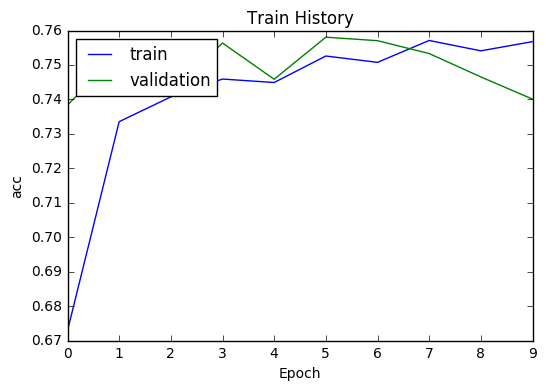

In [45]:
show_train_history(train_history,'acc','val_acc')

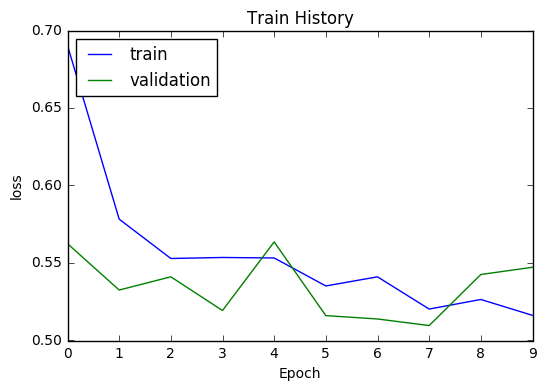

In [46]:
show_train_history(train_history,'loss','val_loss')

In [47]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 0s 55us/step


In [48]:
scores[1]

0.7581728615143669